# Root Finding and Nonlinear Equations
- **Purpose**: Solve f(x) = 0 for scalar and systems of equations
- **scipy.optimize**: root_scalar, root, fsolve, brentq, newton
- **Applications**: Engineering, physics, economics, ML

Key concepts:
- **Root**: Value x where f(x) = 0
- **Bracketing**: Methods that guarantee convergence (bisection, Brent)
- **Newton-type**: Fast but need derivative (Newton-Raphson, secant)
- **System**: Multiple equations f₁(x) = 0, f₂(x) = 0, ...

Real applications:
- **Break-even analysis**: Find price/quantity where profit = 0
- **Option pricing**: Solve Black-Scholes for implied volatility
- **Equilibrium**: Supply = Demand, chemical reactions
- **Physics**: Trajectory intersections, resonance frequencies
- **Engineering**: Circuit analysis, structural mechanics

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Root finding module loaded")

Root finding module loaded


## Basic Example: Bisection Method

**Algorithm**: Repeatedly halve interval

**Requirements**:
- f(a) and f(b) have opposite signs
- f is continuous

**Advantages**:
- Guaranteed convergence
- Robust and reliable
- No derivative needed

**Disadvantages**:
- Slower than Newton methods
- Needs bracketing interval

**Function**: `optimize.bisect(f, a, b)`

Solve: x³ - 2x - 5 = 0

Bracketing interval: [2.0, 3.0]
  f(2.0) = -1.0000
  f(3.0) = 16.0000
  Opposite signs ✓

Bisection result:
  Root: x = 2.0945514815
  f(x) = -1.25e-11

Verification: 2.0945514815412025³ - 2×2.0945514815412025 - 5 ≈ 0 ✓


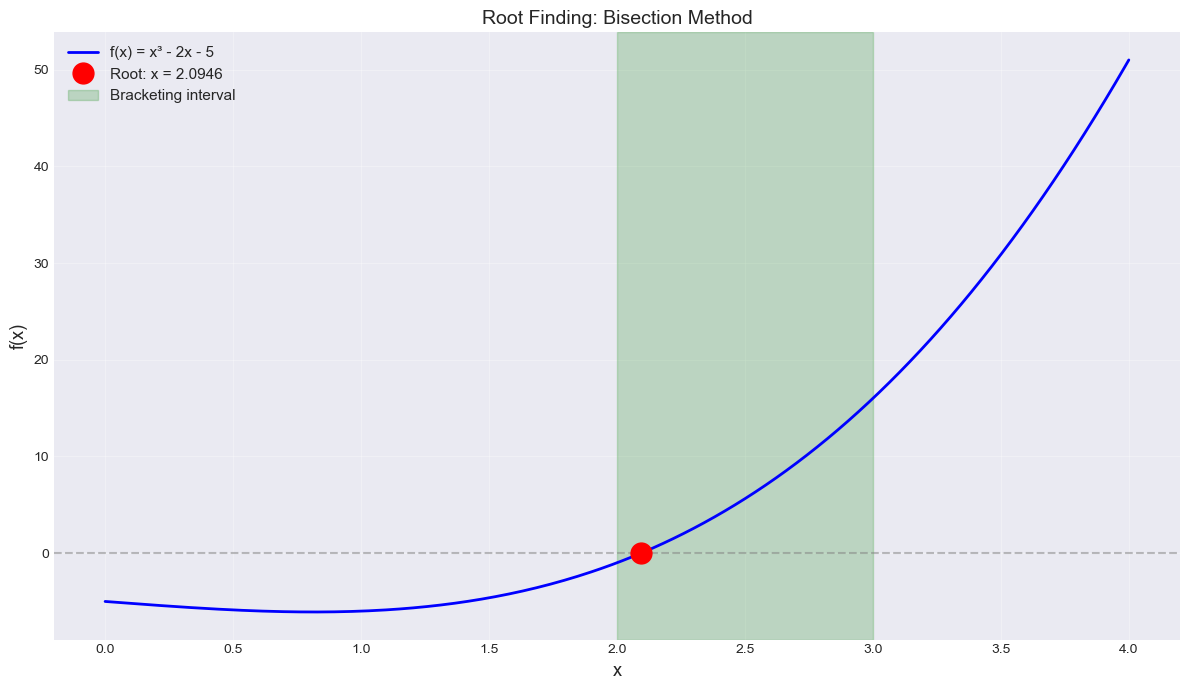


Bisection is slow but guaranteed to converge!


In [2]:
# Simple equation: x³ - 2x - 5 = 0
def f(x):
    return x**3 - 2*x - 5

# Find root using bisection
# Need bracket where f(a) and f(b) have different signs
a, b = 2.0, 3.0

print(f"Solve: x³ - 2x - 5 = 0")
print(f"\nBracketing interval: [{a}, {b}]")
print(f"  f({a}) = {f(a):.4f}")
print(f"  f({b}) = {f(b):.4f}")
print(f"  Opposite signs ✓\n")

# Bisection
root_bisect = optimize.bisect(f, a, b)
print(f"Bisection result:")
print(f"  Root: x = {root_bisect:.10f}")
print(f"  f(x) = {f(root_bisect):.2e}")

# Verify
print(f"\nVerification: {root_bisect}³ - 2×{root_bisect} - 5 ≈ 0 ✓")

# Visualize
x = np.linspace(0, 4, 300)
y = f(x)

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.plot(root_bisect, f(root_bisect), 'ro', markersize=15,
         label=f'Root: x = {root_bisect:.4f}')
plt.axvspan(a, b, alpha=0.2, color='green', label='Bracketing interval')
plt.xlabel('x', fontsize=13)
plt.ylabel('f(x)', fontsize=13)
plt.title('Root Finding: Bisection Method', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nBisection is slow but guaranteed to converge!")

## Newton-Raphson Method

**Algorithm**: Linearize and iterate
\[ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \]

**Advantages**:
- Quadratic convergence (very fast!)
- Fewest iterations

**Disadvantages**:
- Requires derivative f'(x)
- Can diverge with bad initial guess
- Fails if f'(x) = 0

**Function**: `optimize.newton(f, x0, fprime=df)`

In [3]:
# Same equation with derivative
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

# Newton-Raphson
x0 = 2.5  # Initial guess
root_newton = optimize.newton(f, x0, fprime=df)

print("Newton-Raphson Method")
print(f"  Initial guess: x₀ = {x0}")
print(f"  Root: x = {root_newton:.10f}")
print(f"  f(x) = {f(root_newton):.2e}")

# Compare with bisection
print(f"\nComparison:")
print(f"  Bisection: {root_bisect:.10f}")
print(f"  Newton: {root_newton:.10f}")
print(f"  Difference: {abs(root_bisect - root_newton):.2e}")

# Demonstrate convergence speed
print(f"\nConvergence demonstration:")
x = x0
for i in range(5):
    x_new = x - f(x)/df(x)
    print(f"  Iteration {i+1}: x = {x_new:.10f}, f(x) = {f(x_new):.2e}")
    x = x_new

print("\nNewton converges in ~4 iterations (quadratic convergence)!")

Newton-Raphson Method
  Initial guess: x₀ = 2.5
  Root: x = 2.0945514815
  f(x) = -8.88e-16

Comparison:
  Bisection: 2.0945514815
  Newton: 2.0945514815
  Difference: 1.12e-12

Convergence demonstration:
  Iteration 1: x = 2.1641791045, f(x) = 8.08e-01
  Iteration 2: x = 2.0971353558, f(x) = 2.89e-02
  Iteration 3: x = 2.0945552324, f(x) = 4.19e-05
  Iteration 4: x = 2.0945514816, f(x) = 8.84e-11
  Iteration 5: x = 2.0945514815, f(x) = -8.88e-16

Newton converges in ~4 iterations (quadratic convergence)!


## Brent's Method (Hybrid)

**Best of both worlds**: Combines bisection + inverse quadratic interpolation

**Advantages**:
- Fast convergence (superlinear)
- Guaranteed convergence (bracketing)
- No derivative needed
- **Recommended default**

**Function**: `optimize.brentq(f, a, b)`

**Use when**: Don't have derivative, want reliability + speed

In [4]:
# Brent's method
root_brent = optimize.brentq(f, 2, 3)

print("Method Comparison on x³ - 2x - 5 = 0\n")
print(f"{'Method':<15} {'Root':<20} {'f(root)':<15} {'Derivative?'}")
print("="*65)
print(f"{'Bisection':<15} {root_bisect:<20.10f} {f(root_bisect):<15.2e} {'No'}")
print(f"{'Brent':<15} {root_brent:<20.10f} {f(root_brent):<15.2e} {'No'}")
print(f"{'Newton':<15} {root_newton:<20.10f} {f(root_newton):<15.2e} {'Yes'}")

print("\nRecommendations:")
print("  • Default: Brent (brentq) - fast & reliable")
print("  • Have derivative: Newton - fastest")
print("  • Very robust needed: Bisection - guaranteed")

Method Comparison on x³ - 2x - 5 = 0

Method          Root                 f(root)         Derivative?
Bisection       2.0945514815         -1.25e-11       No
Brent           2.0945514815         3.55e-15        No
Newton          2.0945514815         -8.88e-16       Yes

Recommendations:
  • Default: Brent (brentq) - fast & reliable
  • Have derivative: Newton - fastest
  • Very robust needed: Bisection - guaranteed


## Real Example: Break-Even Analysis

**Business problem**: Find quantity where profit = 0

**Model**:
- Fixed costs: $10,000
- Variable cost: $20 per unit
- Price: $50 per unit
- But demand decreases with quantity: P(Q) = 50 - 0.01Q

**Profit**: Π(Q) = Q·P(Q) - (10000 + 20Q)

**Goal**: Find Q where Π(Q) = 0 (break-even point)

In [5]:
# Profit function
def profit(Q):
    fixed_cost = 10000
    variable_cost = 20
    price = 50 - 0.01*Q  # Demand curve
    revenue = Q * price
    total_cost = fixed_cost + variable_cost * Q
    return revenue - total_cost

print("Break-Even Analysis")
print("  Fixed costs: $10,000")
print("  Variable cost: $20/unit")
print("  Price: P(Q) = 50 - 0.01Q (demand curve)")
print("  Profit: Π(Q) = Q·P(Q) - (10000 + 20Q)\n")

# Find break-even points (there may be two!)
# Search in reasonable range
Q_range = np.linspace(0, 3000, 1000)
profit_vals = [profit(q) for q in Q_range]

# Find where profit crosses zero
# Two break-even points typically exist
breakeven1 = optimize.brentq(profit, 100, 1000)
breakeven2 = optimize.brentq(profit, 2000, 2500)

print("Break-even points:")
print(f"  Q₁ = {breakeven1:.0f} units")
print(f"  Q₂ = {breakeven2:.0f} units")

# Find maximum profit
Q_max_profit = optimize.minimize_scalar(lambda q: -profit(q), 
                                        bounds=(breakeven1, breakeven2),
                                        method='bounded').x
max_profit = profit(Q_max_profit)

print(f"\nOptimal production:")
print(f"  Q* = {Q_max_profit:.0f} units")
print(f"  Max profit = ${max_profit:.2f}")
print(f"  Price at Q* = ${50 - 0.01*Q_max_profit:.2f}")

print(f"\nInterpretation:")
print(f"  - Produce less than {breakeven1:.0f}: Loss (fixed costs not covered)")
print(f"  - Produce {breakeven1:.0f} to {breakeven2:.0f}: Profit")
print(f"  - Produce more than {breakeven2:.0f}: Loss (price too low)")

# Visualize
plt.figure(figsize=(14, 8))
plt.plot(Q_range, profit_vals, 'b-', linewidth=2, label='Profit Π(Q)')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.plot(breakeven1, 0, 'ro', markersize=12, label=f'Break-even 1: Q={breakeven1:.0f}')
plt.plot(breakeven2, 0, 'ro', markersize=12, label=f'Break-even 2: Q={breakeven2:.0f}')
plt.plot(Q_max_profit, max_profit, 'g^', markersize=15,
         label=f'Max profit: Q={Q_max_profit:.0f}, Π=${max_profit:.0f}')
plt.axvspan(breakeven1, breakeven2, alpha=0.2, color='green', label='Profitable range')
plt.xlabel('Quantity (Q)', fontsize=13)
plt.ylabel('Profit ($)', fontsize=13)
plt.title('Break-Even Analysis: Finding Profit = 0', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRoot finding identifies break-even points for business planning!")

Break-Even Analysis
  Fixed costs: $10,000
  Variable cost: $20/unit
  Price: P(Q) = 50 - 0.01Q (demand curve)
  Profit: Π(Q) = Q·P(Q) - (10000 + 20Q)



ValueError: f(a) and f(b) must have different signs

## System of Nonlinear Equations

**Problem**: Solve multiple equations simultaneously
\[ \begin{cases} f_1(x_1, x_2, \ldots) = 0 \\ f_2(x_1, x_2, \ldots) = 0 \\ \vdots \end{cases} \]

**Method**: Newton's method for systems (Jacobian)

**Functions**:
- `optimize.fsolve(func, x0)`: Classic solver
- `optimize.root(func, x0, method='hybr')`: Modern interface

**Example**: Supply-Demand equilibrium with multiple markets

In [ ]:
# System: Find intersection of two curves
# Equation 1: x² + y² = 10 (circle)
# Equation 2: y = x² - 2 (parabola)

def equations(vars):
    x, y = vars
    eq1 = x**2 + y**2 - 10  # Circle
    eq2 = y - (x**2 - 2)     # Parabola
    return [eq1, eq2]

# Solve from different initial guesses (multiple solutions)
initial_guesses = [[1, 1], [-1, 1], [2, 2], [-2, 2]]

print("System of Nonlinear Equations")
print("  Equation 1: x² + y² = 10 (circle)")
print("  Equation 2: y = x² - 2 (parabola)\n")
print("Finding intersection points:\n")

solutions = []
for i, guess in enumerate(initial_guesses, 1):
    sol = optimize.fsolve(equations, guess)
    x_sol, y_sol = sol
    
    # Check if truly different solution
    is_new = True
    for prev_sol in solutions:
        if np.allclose(sol, prev_sol, atol=1e-6):
            is_new = False
            break
    
    if is_new:
        solutions.append(sol)
        # Verify
        residual = equations(sol)
        print(f"Solution {len(solutions)}:")
        print(f"  (x, y) = ({x_sol:.6f}, {y_sol:.6f})")
        print(f"  Residual: {np.linalg.norm(residual):.2e}\n")

# Visualize
fig, ax = plt.subplots(figsize=(10, 10))

# Circle: x² + y² = 10
theta = np.linspace(0, 2*np.pi, 200)
x_circle = np.sqrt(10) * np.cos(theta)
y_circle = np.sqrt(10) * np.sin(theta)
ax.plot(x_circle, y_circle, 'b-', linewidth=2, label='x² + y² = 10')

# Parabola: y = x² - 2
x_para = np.linspace(-4, 4, 200)
y_para = x_para**2 - 2
ax.plot(x_para, y_para, 'r-', linewidth=2, label='y = x² - 2')

# Solutions
for i, sol in enumerate(solutions, 1):
    ax.plot(sol[0], sol[1], 'go', markersize=15, 
            label=f'Solution {i}: ({sol[0]:.2f}, {sol[1]:.2f})')

ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.set_title('System of Equations: Circle ∩ Parabola', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axis('equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.tight_layout()
plt.show()

print(f"Found {len(solutions)} intersection points!")

## Real Example: Supply-Demand Equilibrium

**Two related markets**: Goods A and B (substitutes or complements)

**Market A**:
- Supply: Sₐ = 10 + 2Pₐ - 0.5Pᵦ
- Demand: Dₐ = 50 - 3Pₐ + Pᵦ

**Market B**:
- Supply: Sᵦ = 15 + 1.5Pᵦ - 0.3Pₐ
- Demand: Dᵦ = 40 - 2Pᵦ + 0.5Pₐ

**Equilibrium**: Sₐ = Dₐ and Sᵦ = Dᵦ simultaneously

In [ ]:
# Supply-demand equations
def market_equations(prices):
    P_A, P_B = prices
    
    # Market A
    supply_A = 10 + 2*P_A - 0.5*P_B
    demand_A = 50 - 3*P_A + P_B
    eq_A = supply_A - demand_A  # Should be 0 at equilibrium
    
    # Market B
    supply_B = 15 + 1.5*P_B - 0.3*P_A
    demand_B = 40 - 2*P_B + 0.5*P_A
    eq_B = supply_B - demand_B  # Should be 0 at equilibrium
    
    return [eq_A, eq_B]

# Solve for equilibrium
initial_guess = [10, 10]
equilibrium = optimize.fsolve(market_equations, initial_guess)

P_A_eq, P_B_eq = equilibrium

# Calculate equilibrium quantities
Q_A_eq = 10 + 2*P_A_eq - 0.5*P_B_eq  # Or use demand equation
Q_B_eq = 15 + 1.5*P_B_eq - 0.3*P_A_eq

print("Two-Market Equilibrium")
print("\nMarket A:")
print("  Supply: Sₐ = 10 + 2Pₐ - 0.5Pᵦ")
print("  Demand: Dₐ = 50 - 3Pₐ + Pᵦ")
print("\nMarket B:")
print("  Supply: Sᵦ = 15 + 1.5Pᵦ - 0.3Pₐ")
print("  Demand: Dᵦ = 40 - 2Pᵦ + 0.5Pₐ")

print("\n" + "="*50)
print("Equilibrium Solution:")
print("="*50)
print(f"\nMarket A:")
print(f"  Price: ${P_A_eq:.2f}")
print(f"  Quantity: {Q_A_eq:.2f} units")

print(f"\nMarket B:")
print(f"  Price: ${P_B_eq:.2f}")
print(f"  Quantity: {Q_B_eq:.2f} units")

# Verify equilibrium
residual = market_equations(equilibrium)
print(f"\nVerification (should be ~0):")
print(f"  Market A excess demand: {residual[0]:.2e}")
print(f"  Market B excess demand: {residual[1]:.2e}")

# Check supply = demand
demand_A_check = 50 - 3*P_A_eq + P_B_eq
demand_B_check = 40 - 2*P_B_eq + 0.5*P_A_eq

print(f"\nSupply = Demand check:")
print(f"  Market A: {Q_A_eq:.2f} = {demand_A_check:.2f} ✓")
print(f"  Market B: {Q_B_eq:.2f} = {demand_B_check:.2f} ✓")

print("\nBoth markets clear simultaneously at equilibrium!")

## Summary

### Scalar Root Finding:

```python
# Bracketing methods (guaranteed convergence)
root = optimize.bisect(f, a, b)      # Bisection
root = optimize.brentq(f, a, b)      # Brent (BEST DEFAULT)

# Newton-type (fast but need derivative)
root = optimize.newton(f, x0, fprime=df)  # Newton-Raphson

# Modern unified interface
result = optimize.root_scalar(f, bracket=[a, b], method='brentq')
```

### System of Equations:

```python
# Classic interface
solution = optimize.fsolve(equations, x0)

# Modern interface (more options)
result = optimize.root(equations, x0, method='hybr')
```

### Method Selection:

| Situation | Recommended Method |
|-----------|-------------------|
| **Default choice** | `brentq` (fast + guaranteed) |
| **Have derivative** | `newton` (fastest) |
| **Need robustness** | `bisect` (slow but sure) |
| **System of equations** | `fsolve` or `root` |

### Best Practices:

✓ **Plot function first** to understand behavior  
✓ **Bracket properly** for bracketing methods  
✓ **Good initial guess** critical for Newton  
✓ **Multiple starting points** for systems (multiple solutions)  
✓ **Verify solution** by computing f(root)  

### Applications:

- **Economics**: Equilibrium, break-even, pricing
- **Finance**: Options pricing, yield curves
- **Engineering**: Circuit analysis, structural design
- **Physics**: Trajectories, energy levels
- **Chemistry**: Reaction equilibrium

### Common Issues:

⚠️ **Multiple roots**: Plot to identify all roots  
⚠️ **No convergence**: Try different initial guess  
⚠️ **Oscillation**: Use more robust method (Brent)  
⚠️ **Division by zero**: Newton fails at f'(x)=0  